# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import sys
sys.path.append('C:\\Users\\jtile\\Documents\\GA Tech\\Homework\\Jerry_Tilenis\\python-api-challenge')
#print(f"\n{sys.path}")

In [3]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial&"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# the following weather information
# Temperature 
# Humidity 
# Cloudiness 
# Wind Speed 

city_count = len(cities)

# set up lists to hold reponse info
city_data = []
x=0

# Loop through the list of cities and perform a request for data on each
print(f"Beginning Data Retrieval")     
print(f"-----------------------------")
for city in cities:
    x+=1
    response = requests.get(query_url + city).json()
    #print(f"{response}")
    try:    
        city_id = response['id']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        city_date = response['dt']
        print(f"Processing Record {x} of {city_count} | {city}")
        city_data.append({"City ID":city_id,
                         "City":city,
                         "Country":country,
                         "City Date":city_date,
                         "Lat":lat,
                          "Lng":lng,
                         "Max Temp":max_temp,
                         "Humidity":humidity,
                         "Clouds":clouds,
                         "Wind Speed":wind_speed})
        
    except:
        print(f"{city} City not found. Skipping...")
        
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")
    
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 610 | port elizabeth
Processing Record 2 of 610 | rocha
Processing Record 3 of 610 | kavieng
Processing Record 4 of 610 | anchorage
Processing Record 5 of 610 | bethel
Processing Record 6 of 610 | punta arenas
Processing Record 7 of 610 | chokurdakh
Processing Record 8 of 610 | derac
Processing Record 9 of 610 | beirut
Processing Record 10 of 610 | kondinskoye
Processing Record 11 of 610 | nikolskoye
Processing Record 12 of 610 | brae
Processing Record 13 of 610 | ponta do sol
Processing Record 14 of 610 | braganca
kamenskoye City not found. Skipping...
Processing Record 16 of 610 | owando
Processing Record 17 of 610 | pereslavl-zalesskiy
Processing Record 18 of 610 | ushuaia
Processing Record 19 of 610 | albany
Processing Record 20 of 610 | upernavik
Processing Record 21 of 610 | husavik
Processing Record 22 of 610 | safaga
Processing Record 23 of 610 | tessalit
Processing Record 24 of 610 | atuona
Processin

navapur City not found. Skipping...
Processing Record 208 of 610 | itacare
Processing Record 209 of 610 | barra patuca
Processing Record 210 of 610 | sakakah
Processing Record 211 of 610 | roald
Processing Record 212 of 610 | castro
Processing Record 213 of 610 | bloomfield
Processing Record 214 of 610 | ambovombe
tabiauea City not found. Skipping...
Processing Record 216 of 610 | izmalkovo
Processing Record 217 of 610 | kingman
Processing Record 218 of 610 | arroyo
Processing Record 219 of 610 | coihaique
Processing Record 220 of 610 | carinhanha
Processing Record 221 of 610 | casino
Processing Record 222 of 610 | grand forks
Processing Record 223 of 610 | te anau
Processing Record 224 of 610 | shimoda
Processing Record 225 of 610 | saint-pierre
Processing Record 226 of 610 | talnakh
Processing Record 227 of 610 | reconquista
Processing Record 228 of 610 | praxedis guerrero
Processing Record 229 of 610 | dezhou
Processing Record 230 of 610 | yimnon
Processing Record 231 of 610 | maari

Processing Record 413 of 610 | dahuk
Processing Record 414 of 610 | kodiak
Processing Record 415 of 610 | manubul
Processing Record 416 of 610 | inongo
Processing Record 417 of 610 | wencheng
Processing Record 418 of 610 | palmares do sul
Processing Record 419 of 610 | emerald
Processing Record 420 of 610 | portland
Processing Record 421 of 610 | kota kinabalu
Processing Record 422 of 610 | la paz
meyungs City not found. Skipping...
Processing Record 424 of 610 | egvekinot
Processing Record 425 of 610 | iisalmi
Processing Record 426 of 610 | lavrentiya
yefira City not found. Skipping...
rawannawi City not found. Skipping...
Processing Record 429 of 610 | oranjemund
Processing Record 430 of 610 | piranhas
Processing Record 431 of 610 | pacific grove
Processing Record 432 of 610 | kunming
Processing Record 433 of 610 | tabas
Processing Record 434 of 610 | dongsheng
Processing Record 435 of 610 | houma
Processing Record 436 of 610 | davila
Processing Record 437 of 610 | puerto escondido
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_out_df = pd.DataFrame(city_data)

# Export file as a CSV
cities_out_df.to_csv(output_data_file, index=False, header=True)
cities_out_df


,City ID,City,Country,City Date,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed
0,964420,port elizabeth,ZA,1593387511,-33.92,25.57,55.40,66,27,11.41
1,3440777,rocha,UY,1593387511,-34.48,-54.33,43.34,91,65,3.15
2,2094342,kavieng,PG,1593387511,-2.57,150.80,84.90,74,23,11.50
3,5879400,anchorage,US,1593387511,61.22,-149.90,59.00,54,75,6.93
4,5282297,bethel,US,1593387511,41.37,-73.41,73.00,88,40,6.93
...,...,...,...,...,...,...,...,...,...,...
567,1272783,dhemaji,IN,1593387576,27.48,94.58,77.16,86,31,1.97
568,332746,korem,ET,1593387576,12.51,39.52,59.00,68,10,9.15
569,5815135,washington,US,1593387289,47.50,-120.50,70.00,37,80,4.00
570,214389,kaniama,CD,1593387576,-7.57,24.18,70.29,44,35,3.78


In [19]:
cities_out_df.count()

City ID       588
City          588
Country       588
City Date     588
Lat           588
Max Temp      588
Humidity      588
Clouds        588
Wind Speed    588
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
new_df = cities_out_df[cities_out_df.Humidity <= 100]
new_df

,City ID,City,Country,City Date,Lat,Max Temp,Humidity,Clouds,Wind Speed
0,364933,umm kaddadah,SD,1593363922,13.60,98.96,17,33,6.91
1,6201424,mataura,NZ,1593363922,-46.19,39.00,83,99,3.00
2,6185377,yellowknife,CA,1593363922,62.46,63.00,48,75,10.29
3,3874787,punta arenas,CL,1593363922,-53.15,33.01,84,0,9.17
4,3372707,ribeira grande,PT,1593363922,38.52,73.40,83,75,13.87
...,...,...,...,...,...,...,...,...,...
583,3465769,conceicao da barra,BR,1593363984,-18.59,78.35,67,0,10.18
584,1512218,aban,RU,1593364000,56.67,64.13,91,99,10.96
585,3893726,constitucion,CL,1593364000,-35.33,54.48,93,100,16.93
586,3663524,manaquiri,BR,1593364001,-3.32,89.60,70,40,6.93


In [115]:
cities_out_df.describe()

,City ID,City Date,Lat,Max Temp,Humidity,Clouds,Wind Speed
count,5.940000e+02,5.940000e+02,594.000000,594.000000,594.000000,594.000000,594.000000
mean,2.743614e+06,1.593303e+09,22.205354,68.363333,71.291246,51.340067,7.727155
std,1.720803e+06,7.476189e+01,32.809886,14.411751,20.763204,37.326085,5.281861
min,5.365400e+04,1.593302e+09,-54.800000,32.000000,8.000000,0.000000,0.090000
25%,1.526904e+06,1.593303e+09,-5.072500,57.217500,59.000000,15.000000,3.627500
50%,2.214145e+06,1.593303e+09,27.230000,70.670000,77.000000,51.000000,6.310000
75%,3.693589e+06,1.593303e+09,50.080000,78.800000,87.000000,90.000000,10.975000
max,1.072286e+07,1.593303e+09,78.220000,109.400000,100.000000,100.000000,31.090000


In [7]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities with a humidity over 100%.


Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

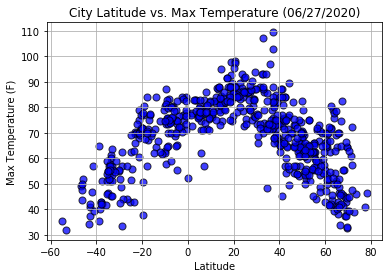

In [83]:
# Latitude vs. Temperature Plot
Lat = cities_out_df["Lat"]
Max_Temp = cities_out_df["Max Temp"]

# Build scatter plot
plt.scatter(Lat, Max_Temp, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (06/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("Latitude_MaxTemp.png")

### City Latitude vs Max Temperature Graph
This graph depicts the temperature correlation between the latitude and temperature.
Temperatures around the equator 0° tend to be warmer than the temperatures closer to the poles.



## Latitude vs. Humidity Plot

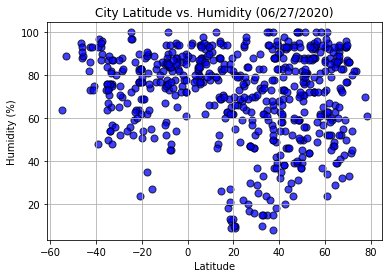

In [84]:
# Latitude vs. Humidity Plot
Lat = cities_out_df["Lat"]
Humidity = cities_out_df["Humidity"]

# Build scatter plot
plt.scatter(Lat, Humidity, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (06/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("Latitude_Humidity.png")

### City Latitude vs Humidity
There are more cities in the northern hemphisphere than the southern hemphispere with low humidity. 

## Latitude vs. Cloudiness Plot

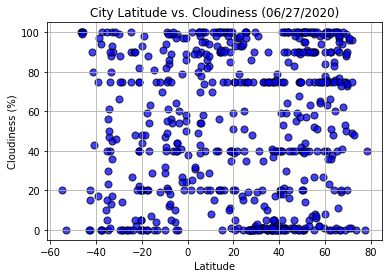

In [88]:
# Latitude vs. Cloudiness Plot
Lat = cities_out_df["Lat"]
Cloudiness = cities_out_df["Clouds"]

# Build scatter plot
plt.scatter(Lat, Cloudiness, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (06/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

## Latitude vs. Cloudiness
There is no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

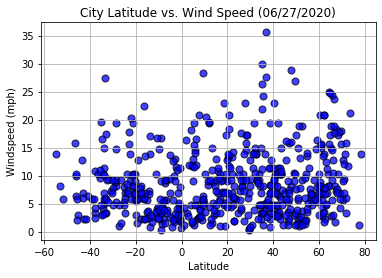

In [5]:
# Latitude vs. Wind Speed Plot
Lat = cities_out_df["Lat"]
Wind_Speed = cities_out_df["Wind Speed"]

# Build scatter plot
plt.scatter(Lat, Wind_Speed, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (06/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid()

# Save the figure
plt.savefig("Latitude_Windspeed.png")

## Latitude vs. Wind Speed Plot
There are more cities in the northern hemisphere than the southern hemisphere.

## Linear Regression

In [81]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name):
    # Get current date
    now = datetime.now()
    cur_date = (now.strftime('%m/%d/%Y'))
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    # find position for line_eq
    x_pos = x_value.min()
    y_pos = y_value.min()
    
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    plt.title(f"{chart_title}\n({cur_date})\n\nThe r-squared is: {rvalue**2}\n")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    #Save the figure
    plt.savefig(f"{fig_name}.png")
    # Show graph
    plt.show()
   

In [21]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere (greater than or equal to 0 degrees latitude) 
northern_cities_df = cities_out_df[cities_out_df.Lat >= 0]
print(northern_cities_df)

#Southern Hemisphere (less than 0 degrees latitude)
southern_cities_df = cities_out_df[cities_out_df.Lat < 0]
print(southern_cities_df)

     City ID              City Country   City Date    Lat  Max Temp  Humidity  \
0     364933      umm kaddadah      SD  1593363922  13.60     98.96        17   
2    6185377       yellowknife      CA  1593363922  62.46     63.00        48   
4    3372707    ribeira grande      PT  1593363922  38.52     73.40        83   
5    3645528    ciudad guayana      VE  1593363922   8.35     95.14        38   
7    2123814     leningradskiy      RU  1593363923  69.38     29.35        97   
..       ...               ...     ...         ...    ...       ...       ...   
580  3670218        san andres      CO  1593364000  12.58     86.00        74   
581  3666042  vigia del fuerte      CO  1593364000   6.58     78.48        88   
582  3170094      portoferraio      IT  1593364000  42.81     82.40        65   
584  1512218              aban      RU  1593364000  56.67     64.13        91   
587  1583992           da nang      VN  1593363784  16.07     84.20        83   

     Clouds  Wind Speed  
0

In [91]:
northern_cities_df.describe()

,City ID,City Date,Lat,Max Temp,Humidity,Clouds,Wind Speed
count,4.230000e+02,4.230000e+02,423.000000,423.000000,423.000000,423.000000,423.000000
mean,2.753754e+06,1.593303e+09,39.578534,70.245485,69.338061,52.874704,7.960000
std,1.858608e+06,7.563046e+01,19.741663,14.361123,22.534789,38.048372,5.311515
min,5.365400e+04,1.593302e+09,0.050000,32.680000,8.000000,0.000000,0.490000
25%,1.495344e+06,1.593303e+09,23.715000,62.285000,55.500000,14.500000,3.950000
50%,2.209055e+06,1.593303e+09,41.300000,72.000000,75.000000,58.000000,6.710000
75%,3.906750e+06,1.593303e+09,55.565000,81.000000,88.000000,90.000000,11.410000
max,1.072286e+07,1.593303e+09,78.220000,109.400000,100.000000,100.000000,29.750000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

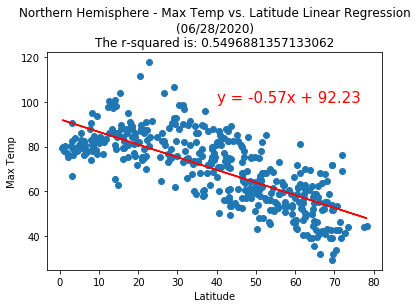

In [76]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_value = northern_cities_df['Lat']
y_value = northern_cities_df['Max Temp']
chart_title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
x_title = "Latitude"
y_title = "Max Temp"
fig_name = "N_Temp_Lat"
lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name)

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression
This chart shows the correlation between latitude and temperature. 
In the northern hemisphere as the latitude increases the temperature decreases.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

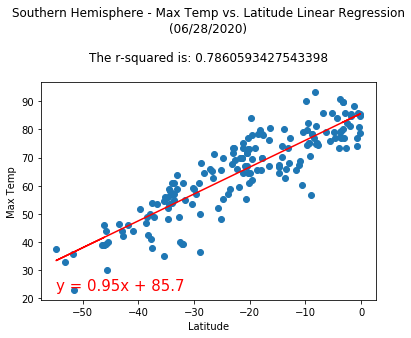

In [82]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_value = southern_cities_df['Lat']
y_value = southern_cities_df['Max Temp']
chart_title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
x_title = "Latitude"
y_title = "Max Temp"
fig_name = "S_Temp_Lat"
lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name)

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression
This chart shows the correlation between latitude and temperature. 
In the southern hemisphere as the latitude deccreases the temperature decreases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

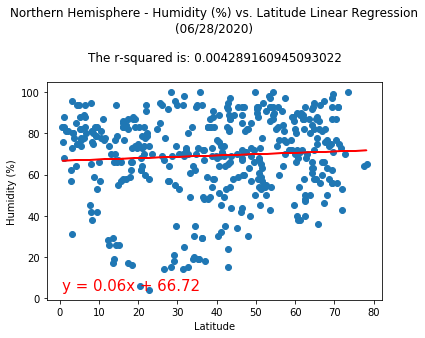

In [83]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_value = northern_cities_df['Lat']
y_value = northern_cities_df['Humidity']
chart_title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
x_title = "Latitude"
y_title = "Humidity (%)"
fig_name = "N_Humid_Lat"
lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name)

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
This graph shows the correlation between humidity and latitude.
In the northern hemisphere as the latitude increases the number of cities with low humidity decreases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

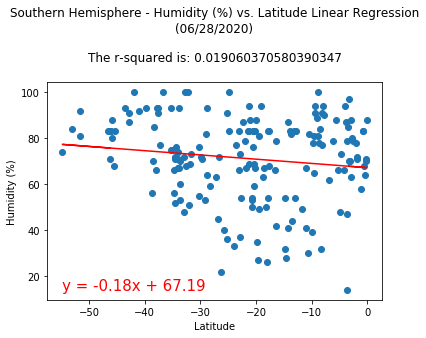

In [84]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_value = southern_cities_df['Lat']
y_value = southern_cities_df['Humidity']
chart_title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
x_title = "Latitude"
y_title = "Humidity (%)"
fig_name = "S_Humid_Lat"
lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name)

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
This graph shows the correlation between humidity and latitude.
In the southern hemisphere as the latitude decreases the number of cities with low humidity decreases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

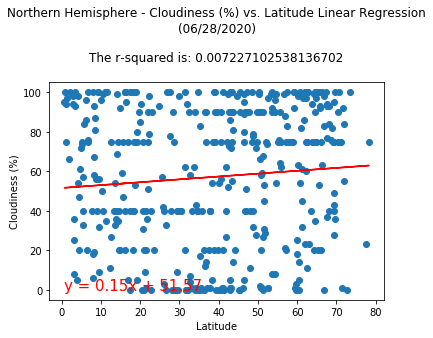

In [85]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_value = northern_cities_df['Lat']
y_value = northern_cities_df['Clouds']
chart_title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
x_title = "Latitude"
y_title = "Cloudiness (%)"
fig_name = "N_Clouds_Lat"
lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name)

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
In the northern hemisphere there is no correlation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

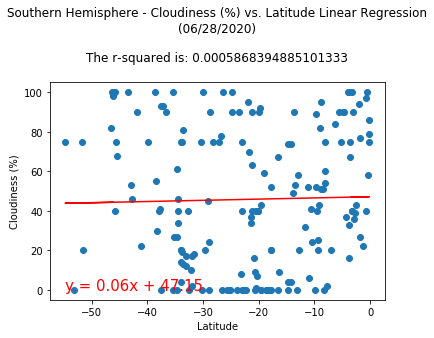

In [86]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_value = southern_cities_df['Lat']
y_value = southern_cities_df['Clouds']
chart_title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
x_title = "Latitude"
y_title = "Cloudiness (%)"
fig_name = "S_Clouds_Lat"
lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name)

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
In the southern hemisphere there is no correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

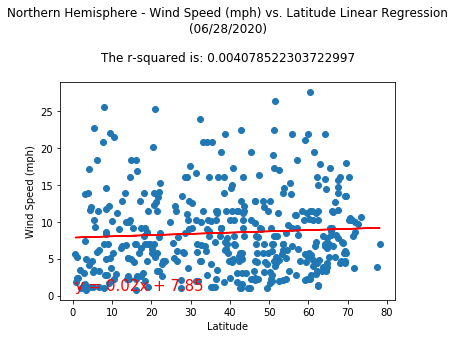

In [87]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_value = northern_cities_df['Lat']
y_value = northern_cities_df['Wind Speed']
chart_title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
x_title = "Latitude"
y_title = "Wind Speed (mph)"
fig_name = "N_Wind_Lat"
lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name)

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
There is no correlation between wind speend and latitude.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

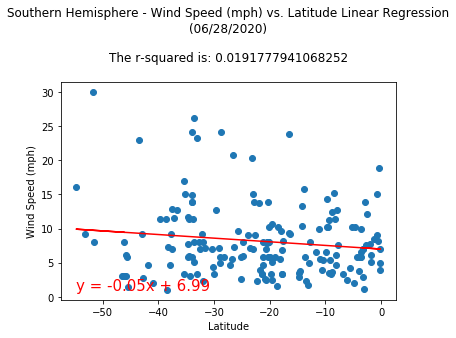

In [88]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_value = southern_cities_df['Lat']
y_value = southern_cities_df['Wind Speed']
chart_title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
x_title = "Latitude"
y_title = "Wind Speed (mph)"
fig_name = "S_Wind_Lat"
lin_reg_plot(x_value,y_value,chart_title,x_title,y_title,fig_name)

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
In the southern hemisphere as the latitude decreases the wind speed increases.